In [1]:
#from keras.datasets import mnist
import matplotlib.pyplot as plt
#import cv2
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
# Read the data...
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:
# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [5]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [6]:
# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

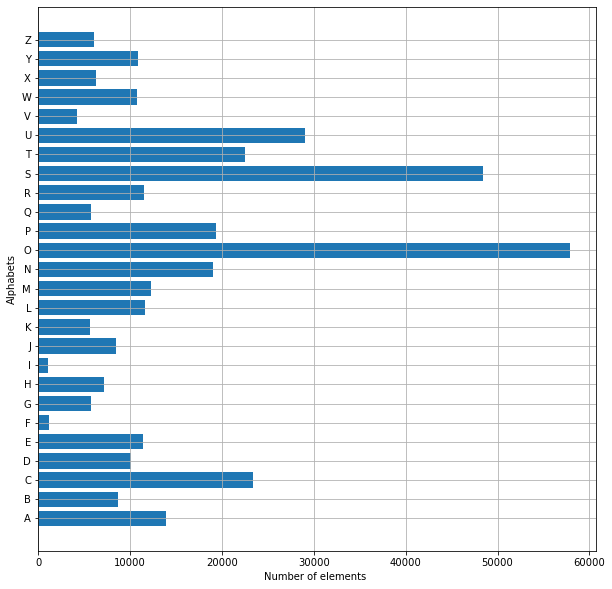

In [7]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

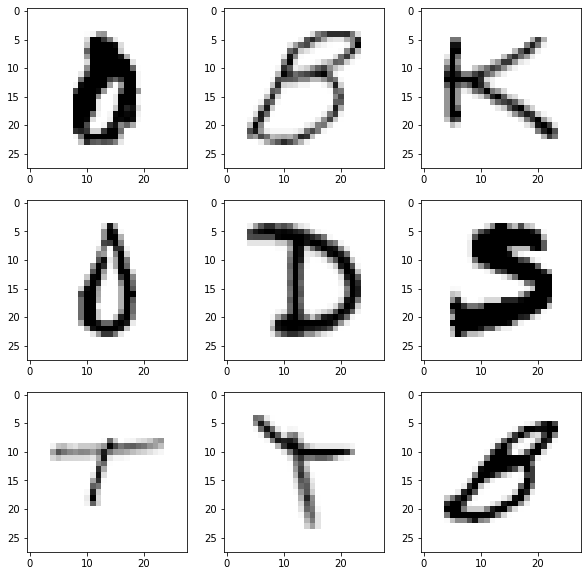

In [8]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


In [9]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [10]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [11]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [15]:
history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))

Epoch 1/5
9312/9312 [==============================] - 329s 35ms/step - loss: 0.1702 - accuracy: 0.9546 - val_loss: 0.0877 - val_accuracy: 0.9761
Epoch 2/5
9312/9312 [==============================] - 336s 36ms/step - loss: 0.0738 - accuracy: 0.9794 - val_loss: 0.0641 - val_accuracy: 0.9830
Epoch 3/5
9312/9312 [==============================] - 351s 38ms/step - loss: 0.0622 - accuracy: 0.9831 - val_loss: 0.0729 - val_accuracy: 0.9804
Epoch 4/5
9312/9312 [==============================] - 357s 38ms/step - loss: 0.0260 - accuracy: 0.9928 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 5/5
9312/9312 [==============================] - 318s 34ms/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0307 - val_accuracy: 0.9927


In [16]:
model.save(r'model_hand.h5')

In [17]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])


The validation accuracy is : [0.976131021976471, 0.9830178618431091, 0.9803866147994995, 0.9910457730293274, 0.9926701784133911]
The training accuracy is : [0.9546247720718384, 0.9793630242347717, 0.9830614924430847, 0.9928278923034668, 0.9953987002372742]
The validation loss is : [0.08770114183425903, 0.06413563340902328, 0.07286196202039719, 0.035207148641347885, 0.030699636787176132]
The training loss is : [0.17021238803863525, 0.07376272231340408, 0.06220627203583717, 0.025969645008444786, 0.016112875193357468]


In [18]:
print(test_X.shape, test_y.shape)
test_y_new = test_y.to_numpy()
type(test_y_new)
type(test_X), test_X.shape

(74490, 28, 28, 1) (74490,)


(numpy.ndarray, (74490, 28, 28, 1))

In [19]:
# Evaluate the model on test set
score = model.evaluate(test_X, test_yOHE, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9926701784133911


In [20]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


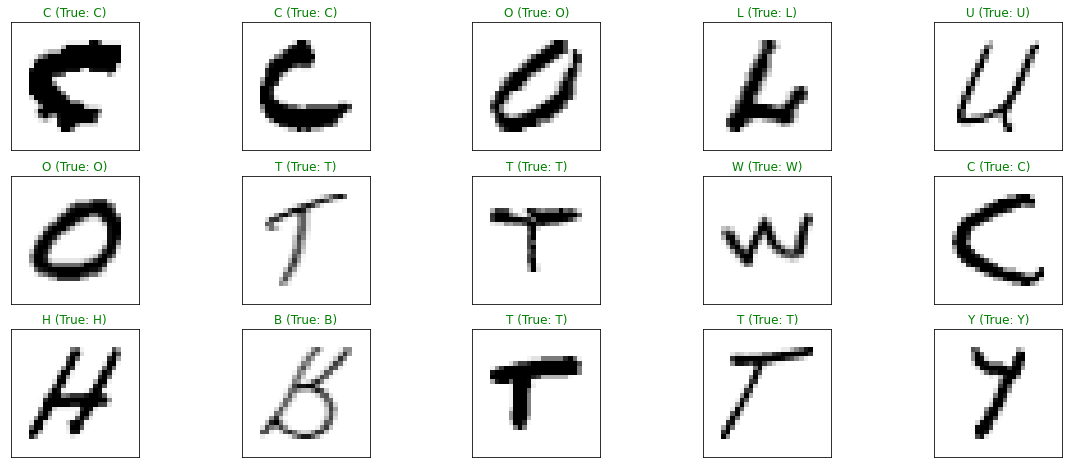

In [21]:
y_hat = model.predict(test_X)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_X.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_X[index]), cmap="Greys")
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_yOHE[index])
    # Set the title for each image
    ax.set_title("{} (True: {})".format(word_dict[predict_index], 
                                  word_dict[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [22]:
history.history

{'loss': [0.17021238803863525,
  0.07376272231340408,
  0.06220627203583717,
  0.025969645008444786,
  0.016112875193357468],
 'accuracy': [0.9546247720718384,
  0.9793630242347717,
  0.9830614924430847,
  0.9928278923034668,
  0.9953987002372742],
 'val_loss': [0.08770114183425903,
  0.06413563340902328,
  0.07286196202039719,
  0.035207148641347885,
  0.030699636787176132],
 'val_accuracy': [0.976131021976471,
  0.9830178618431091,
  0.9803866147994995,
  0.9910457730293274,
  0.9926701784133911],
 'lr': [0.001, 0.001, 0.001, 0.00020000001, 0.00020000001]}



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


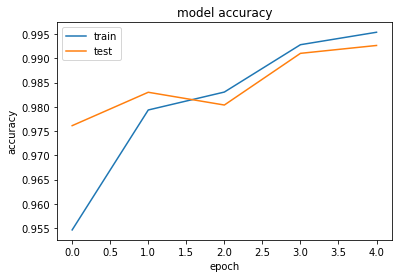

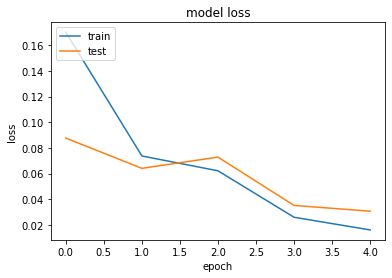

In [23]:
# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

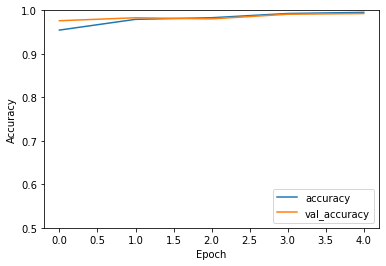

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_X, test_y_new, verbose=2)

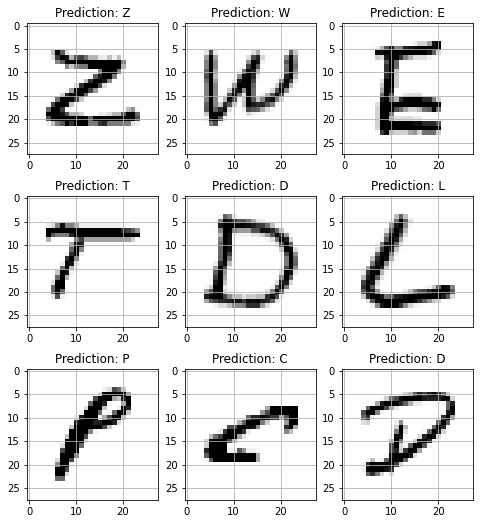

In [26]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
